# Car Price Prediction using Linear Regression Model

# Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.  

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Importing Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing packages for Linear Regression


In [2]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Package for performing test train split
from sklearn.model_selection import train_test_split
# Package for feature scaling
from sklearn.preprocessing import MinMaxScaler
# statmodel linear regression
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding data

In [4]:
#Read data from csv
car_data = pd.read_csv('C:\IITB\csv\CarPrice_Assignment.csv')
# head of the dataset
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Shape of the car data set
car_data.shape

(205, 26)

In [6]:
#Describe car data set
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
#Data types of columns in the car data set
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [8]:
# percentage of missing values in each column
round(car_data.isnull().sum()/len(car_data.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

 Observation: There were no missing values in the car data set

In [9]:
car_data.shape

(205, 26)

Observation : There were no duplicate data since shape remains the same

## Data cleaning

Extract car company from car name column

In [10]:
#Splitting the Car Name with space parameter
CarCompany = car_data['CarName'].apply(lambda x : x.split(' ')[0])

In [11]:
#Insert new column Company name after CarName
car_data.insert(3,"CarCompany",CarCompany)
car_data.head()

,car_ID,symboling,CarName,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
car_data['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Some of the CarCompany has been mis-spelt replacig with the correct names

In [13]:
# Correcting the misspelled company names.
car_data['CarCompany'].replace('maxda','mazda',inplace=True)
car_data['CarCompany'].replace(['vokswagen','vw'],'volkswagen',inplace=True)
car_data['CarCompany'].replace('Nissan','nissan',inplace=True)
car_data['CarCompany'].replace('toyouta','toyota',inplace=True)
car_data['CarCompany'].replace('porcshce','porsche',inplace=True)

In [14]:
#Coorected values after replace
car_data['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
#car_data.groupby('CarCompany').count().sort_values(by CarCompany ascending=False)
car_data.groupby('CarCompany').count()[['CarName']]

,CarName
CarCompany,
alfa-romero,3
audi,7
bmw,8
buick,8
chevrolet,3
dodge,9
honda,13
isuzu,4
jaguar,3


Observation : toyota, mazda, nissan, honda,mitsibhshi are highest sellers

### Visualizing car data variables using pairplot

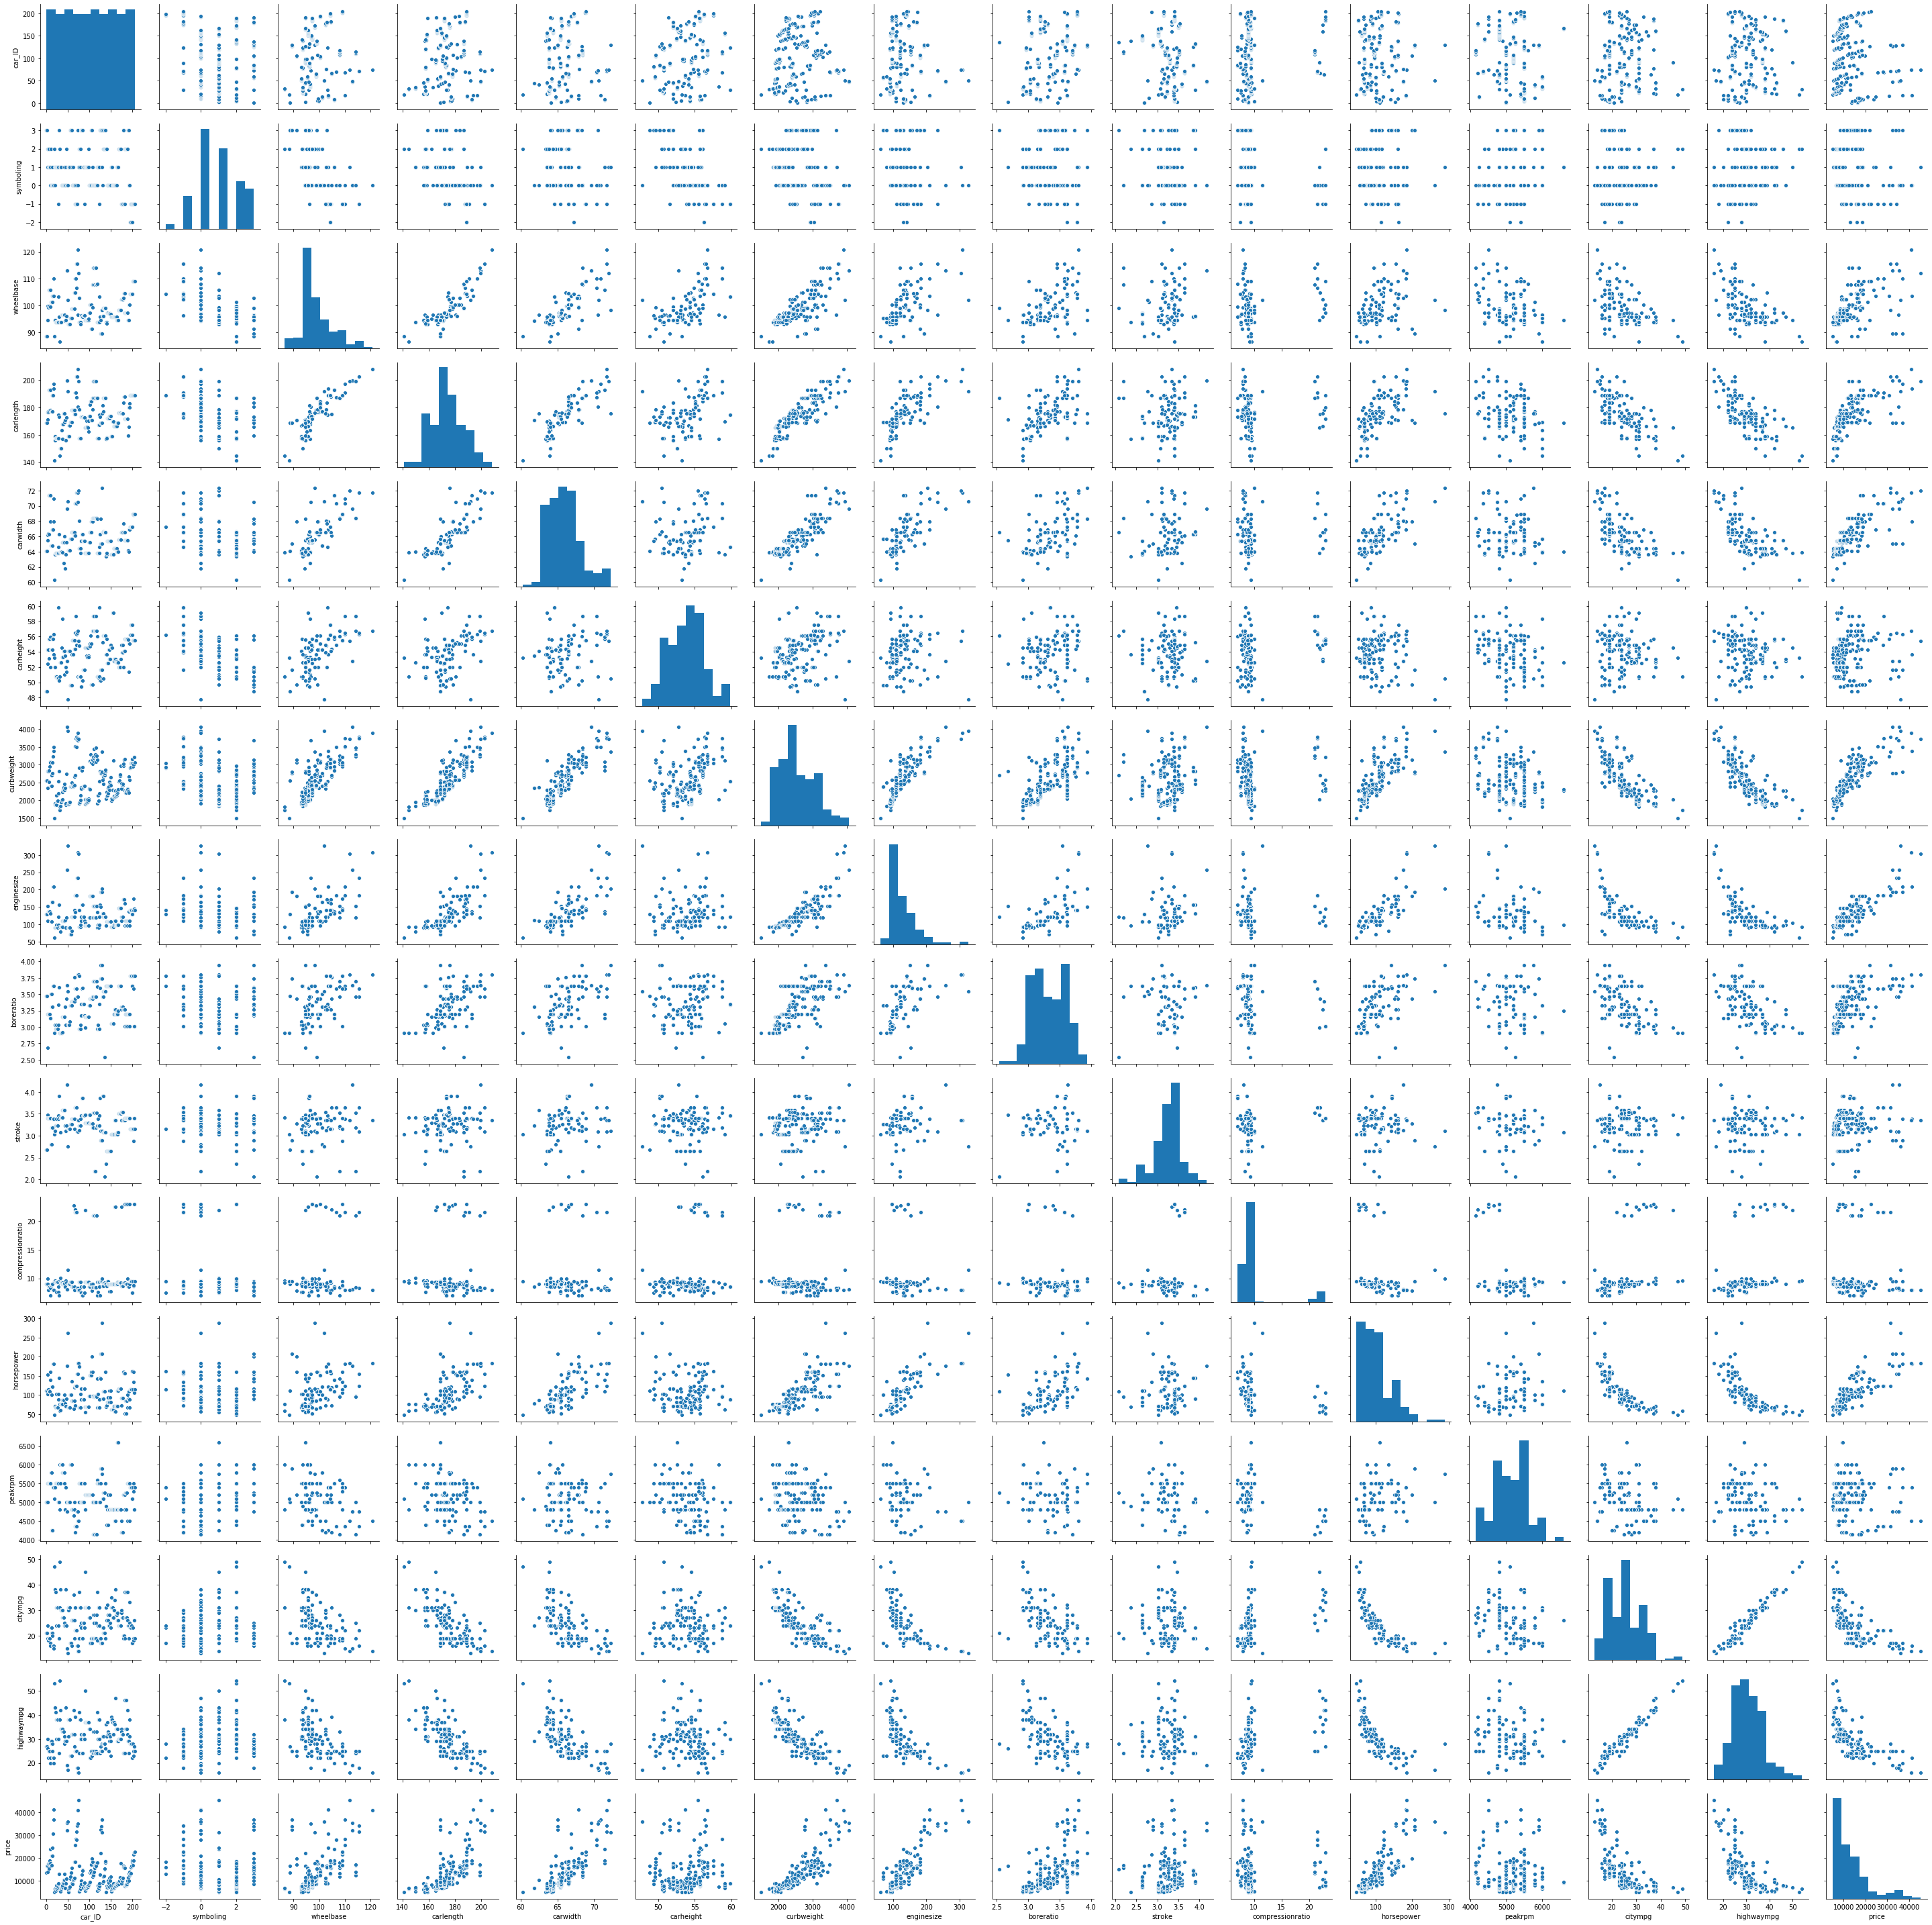

In [16]:
sns.pairplot(car_data)
plt.show()

For categorical variables, lets plot the box plot

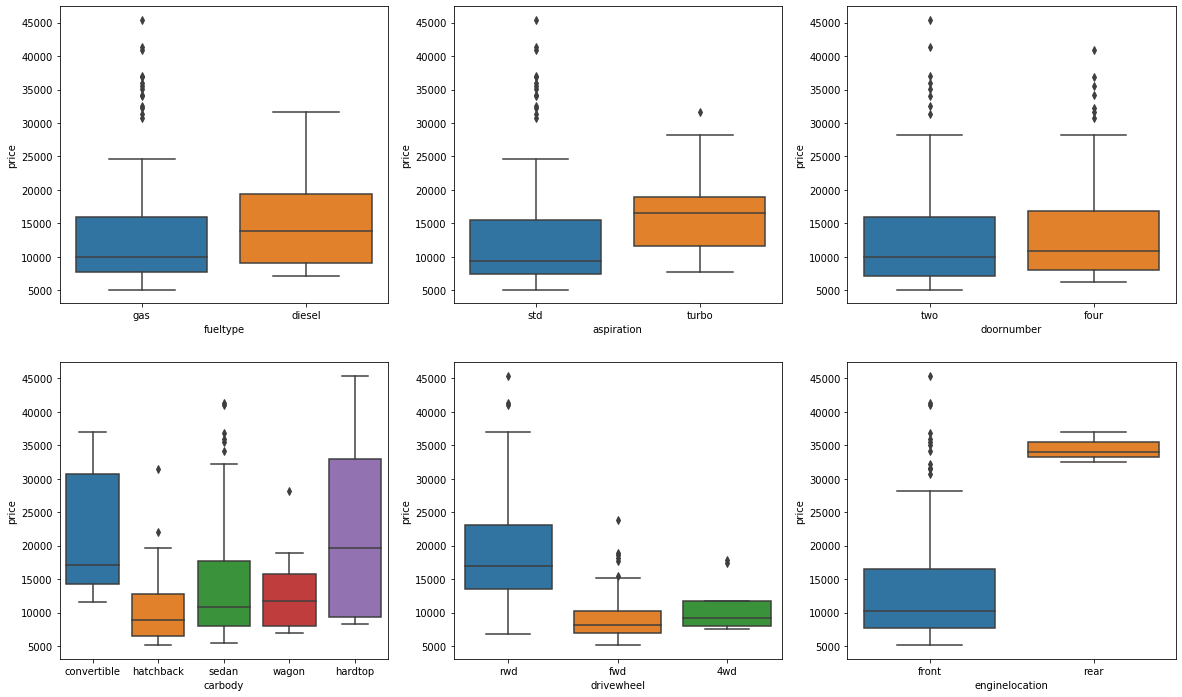

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_data)
plt.show()

Observation: 
i).   Diesel cars have more price 
ii).  Turbo cars have more price
iii). Doornumber do not have much impact on price
iv).  Rear engine cars are very less but are priced remarkably higher
v).   We can observe the outlier values fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation variables

### Bivariate Analysis using hue

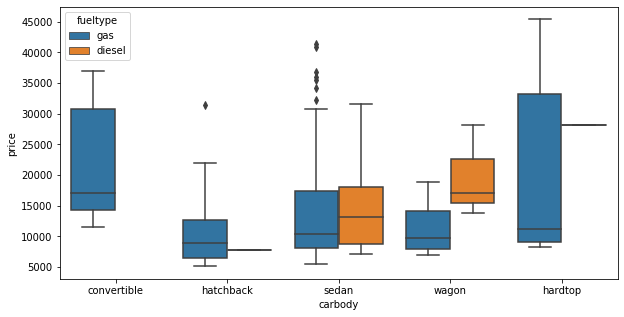

In [18]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'fueltype', data = car_data)
plt.show()

Observation: i). Hatchback , hardtop has only gas variant.ii). Price of Gas variant is higher than diesel iii). Wagon and sedan comes with bith diesel and gas variant

### Variable list for Linear Regression analysis

- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [19]:
cardata_lr = car_data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 
                    'cylindernumber','enginesize', 'boreratio','horsepower', 'carlength','carwidth']]
cardata_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


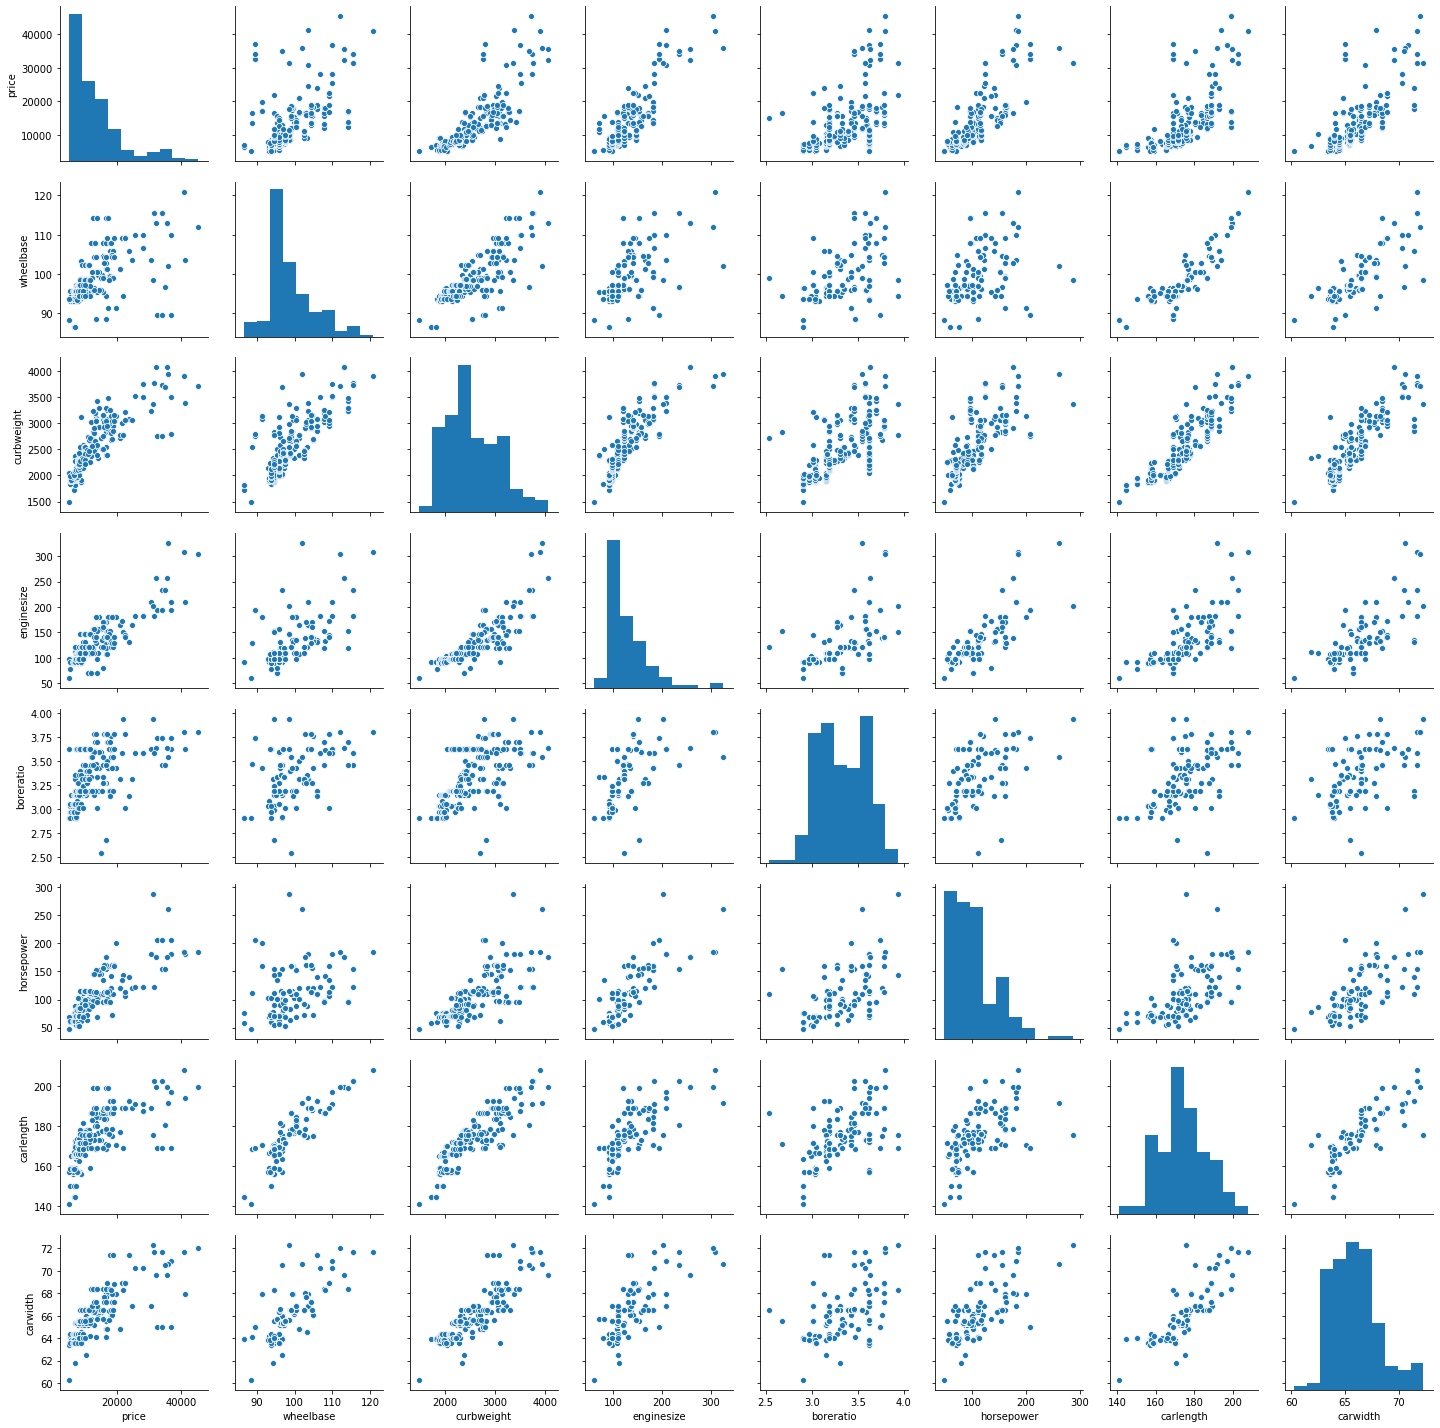

In [20]:
sns.pairplot(cardata_lr)
plt.show()

##### Create dummies/ perform label encoding

In [21]:
# Defining the dummy function to map the values
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [22]:
cardata_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


In [23]:
# Applying the dummies function to the cardata_lr to map the values
cardata_lr = dummies('fueltype',cardata_lr)
cardata_lr = dummies('aspiration',cardata_lr)
cardata_lr = dummies('carbody',cardata_lr)
cardata_lr = dummies('drivewheel',cardata_lr)
cardata_lr = dummies('enginetype',cardata_lr)
cardata_lr = dummies('cylindernumber',cardata_lr)

In [24]:
cardata_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,1,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,1,0,...,1,0,0,0,1,0,0,0,0,0


# Model Building

### Divide the data to train and test

In [25]:
np.random.seed(0)
df_train, df_test = train_test_split(cardata_lr, train_size = 0.8, test_size = 0.2
                                     , random_state = 100)

Perform scaling.

In [26]:
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
3,0.243998,0.455172,0.329325,0.181132,0.404762,0.225000,0.577236,0.491667,1,0,...,1,0,0,0,0,1,0,0,0,0
157,0.057463,0.313793,0.240884,0.139623,0.404762,0.091667,0.409756,0.341667,1,0,...,1,0,0,0,0,1,0,0,0,0
81,0.093406,0.334483,0.325834,0.230189,0.531746,0.166667,0.518699,0.425000,1,0,...,1,0,0,0,0,1,0,0,0,0
32,0.007763,0.244828,0.135376,0.067925,0.182540,0.050000,0.144715,0.308333,1,0,...,1,0,0,0,0,1,0,0,0,0
99,0.105838,0.365517,0.324282,0.222642,0.515873,0.204167,0.525203,0.408333,1,0,...,1,0,0,0,0,1,0,0,0,0


In [28]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000
mean,0.211153,0.404605,0.398579,0.236493,0.489983,0.221037,0.519899,0.454726,0.896341,0.170732,...,0.719512,0.079268,0.054878,0.02439,0.060976,0.762195,0.121951,0.006098,0.006098,0.02439
std,0.212491,0.197731,0.202330,0.148945,0.203913,0.164011,0.197651,0.179980,0.305751,0.377427,...,0.450613,0.270984,0.228440,0.15473,0.240018,0.427043,0.328232,0.078087,0.078087,0.15473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.070475,0.272414,0.247673,0.135849,0.293651,0.090625,0.409756,0.308333,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
50%,0.132856,0.341379,0.347944,0.184906,0.468254,0.183333,0.502439,0.425000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
75%,0.295349,0.475862,0.522789,0.287736,0.682540,0.283333,0.615041,0.516667,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


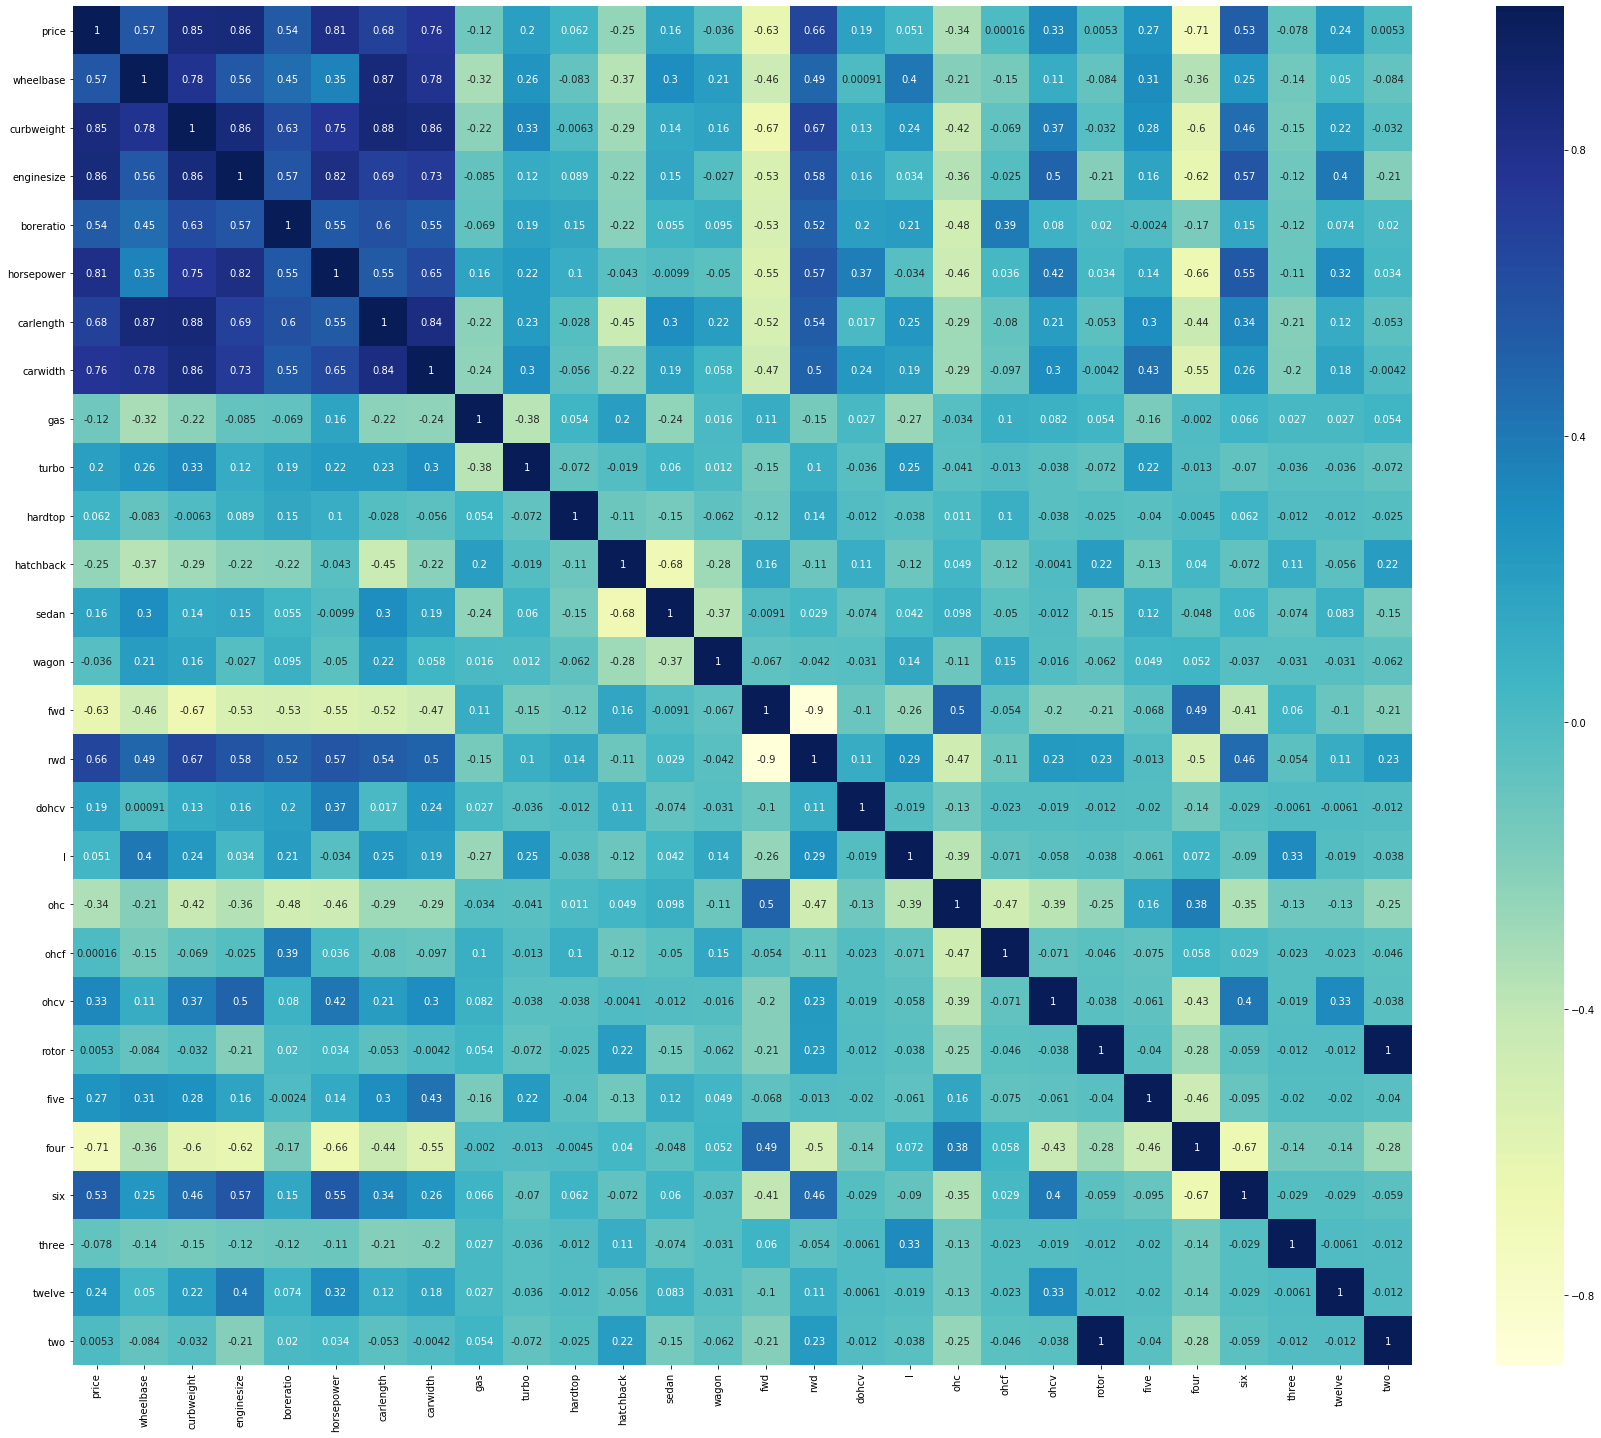

In [29]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Observation : 
Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.


### Divide the data into X and y.

In [30]:
y_train = df_train.pop('price')
X_train = df_train

In [31]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 12),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 9),
 ('horsepower', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('gas', False, 16),
 ('turbo', False, 17),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 18),
 ('rwd', False, 10),
 ('dohcv', False, 3),
 ('l', False, 11),
 ('ohc', False, 5),
 ('ohcf', False, 6),
 ('ohcv', True, 1),
 ('rotor', False, 13),
 ('five', False, 4),
 ('four', False, 2),
 ('six', False, 8),
 ('three', False, 15),
 ('twelve', False, 7),
 ('two', False, 14)]

In [33]:
X_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'carlength', 'carwidth',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'ohcv'],
      dtype='object')

In [34]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,enginesize,horsepower,carlength,carwidth,hardtop,hatchback,sedan,wagon,ohcv
3,0.329325,0.181132,0.225000,0.577236,0.491667,0,0,1,0,0
157,0.240884,0.139623,0.091667,0.409756,0.341667,0,1,0,0,0
81,0.325834,0.230189,0.166667,0.518699,0.425000,0,1,0,0,0
32,0.135376,0.067925,0.050000,0.144715,0.308333,0,1,0,0,0
99,0.324282,0.222642,0.204167,0.525203,0.408333,0,1,0,0,0


In [35]:
#Function to fit the linear regression model from the statmodel package
def fit_LRM(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [36]:
#Function to Calculate the VIFs for the new model
def getVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1:

In [37]:
X_train_new = fit_LRM(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     84.79
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.35e-57
Time:                        13:57:25   Log-Likelihood:                 175.82
No. Observations:                 164   AIC:                            -329.6
Df Residuals:                     153   BIC:                            -295.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.043      0.101      0.9

Observartion:
p-value of carlength is higher than the significance value of 0.05, 
hence dropping it as it is insignificant in presence of other variables.


In [38]:
#Removing carlength feature from the model
X_train_new = X_train_rfe.drop(["carlength"], axis = 1) 

### Model 2:

In [39]:
X_train_new = fit_LRM(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     92.28
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.94e-57
Time:                        13:57:25   Log-Likelihood:                 173.93
No. Observations:                 164   AIC:                            -327.9
Df Residuals:                     154   BIC:                            -296.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0043      0.043     -0.100      0.9

### Calculating the Variance Inflation Factor(VIF)

In [40]:
getVIF(X_train_new)

,Features,VIF
0,const,40.53
7,sedan,9.40
1,curbweight,8.80
6,hatchback,8.69
2,enginesize,6.80
8,wagon,5.23
4,carwidth,4.16
3,horsepower,3.58
5,hardtop,1.79
9,ohcv,1.39


Dropping sedan because of high VIF value. 

In [41]:
#The VIF value for sedan is more than significan value for VIF(5.0). So, removing feature sedan from the model
X_train_new = X_train_new.drop(["sedan"], axis = 1)

### Model 3 :

In [42]:
X_train_new = fit_LRM(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     95.77
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           5.03e-56
Time:                        13:57:26   Log-Likelihood:                 167.95
No. Observations:                 164   AIC:                            -317.9
Df Residuals:                     155   BIC:                            -290.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1305      0.023     -5.748      0.0

Observartion: Dropping hardtop because of high VIF value. 

In [43]:
X_train_new = X_train_new.drop(["hardtop"], axis = 1)

In [44]:
getVIF(X_train_new)

,Features,VIF
0,const,10.25
1,curbweight,8.72
2,enginesize,6.68
4,carwidth,3.98
3,horsepower,3.47
7,ohcv,1.37
6,wagon,1.29
5,hatchback,1.28


### Model 4:

In [45]:
X_train_new = fit_LRM(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     110.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.87e-57
Time:                        13:57:26   Log-Likelihood:                 167.89
No. Observations:                 164   AIC:                            -319.8
Df Residuals:                     156   BIC:                            -295.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1318      0.022     -5.916      0.0

In [46]:
getVIF(X_train_new)

,Features,VIF
0,const,10.25
1,curbweight,8.72
2,enginesize,6.68
4,carwidth,3.98
3,horsepower,3.47
7,ohcv,1.37
6,wagon,1.29
5,hatchback,1.28


Observartion: Dropping curbweight because of high VIF value. 

In [47]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [48]:
#All the variables are less than 5 VIF value other than constant
getVIF(X_train_new)

,Features,VIF
0,const,10.23
1,enginesize,4.71
2,horsepower,3.40
3,carwidth,2.25
6,ohcv,1.36
4,hatchback,1.26
5,wagon,1.11


### The VIF value is less than 5 for all the features. So, it makes a good model.

### Model 5:

In [49]:
X_train_new = fit_LRM(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     123.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           7.28e-57
Time:                        13:57:27   Log-Likelihood:                 164.87
No. Observations:                 164   AIC:                            -315.7
Df Residuals:                     157   BIC:                            -294.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1343      0.023     -5.943      0.0

Observartion:
p-value of wagon is higher than the significance value of 0.05, 
hence dropping it as it is insignificant in presence of other variables.


In [50]:
#Since p-value > 0.05, dropping wagon variable
X_train_new = X_train_new.drop(["wagon"], axis = 1)

In [51]:
X_train_new = fit_LRM(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.60e-57
Time:                        13:57:27   Log-Likelihood:                 163.78
No. Observations:                 164   AIC:                            -315.6
Df Residuals:                     158   BIC:                            -297.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1409      0.022     -6.340      0.0

### The p value is less than for all the features. So, it makes a good model.

In [52]:
getVIF(X_train_new)

,Features,VIF
0,const,9.82
1,enginesize,4.65
2,horsepower,3.40
3,carwidth,2.23
5,ohcv,1.36
4,hatchback,1.16


### The VIF value is less than 5 for all the features. So, it makes a good model.

###### Residual Analysis of Model

In [53]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

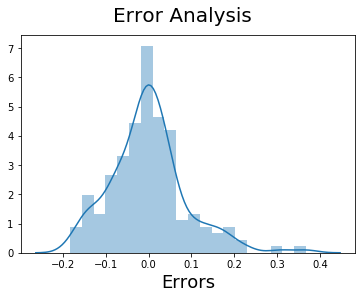

In [54]:
# Plot the histogram
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Analysis', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)   

Observation:  
Error seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

# Prediction and Evaluation of the Model

In [55]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [56]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [57]:
# Lets use the train model(X_train_new) to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [58]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [59]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.739523421334606

Text(0, 0.5, 'y_pred')

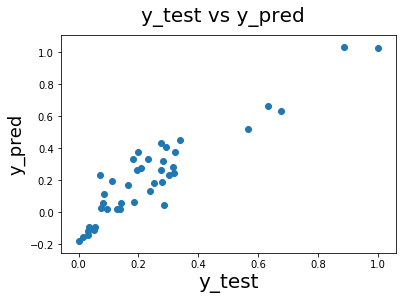

In [60]:
#Evaluation of the model
# Plotting y_test and y_pred to understand the spread of data points.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=20)                          # X-label
plt.ylabel('y_pred', fontsize=18)   

In [61]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.60e-57
Time:                        13:57:30   Log-Likelihood:                 163.78
No. Observations:                 164   AIC:                            -315.6
Df Residuals:                     158   BIC:                            -297.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1409      0.022     -6.340      0.0

### Final Observation :
    R-sqaured and Adjusted R-squared: 0.823 and 0.817 respectively so 82% variance is explained.
    F-stats and Prob(F-stats)is :  146.9 and 1.60e-57(approx. 0.0) respectively. Therefore, Model fit is significant and 
    explained 83% variance is just not by chance.
    p-values - p-values for most of the coefficients seem to be less than the significance level of 0.05. 
    So, all the predictors are statistically significant.